In [1]:
from   data_viz_helpers import *
import matplotlib.pyplot as plt
import numpy as np
import ScraperFC as sfc
import seaborn as sns
import traceback

In [2]:
scraper = sfc.WhoScored()
try:
    match_data = scraper.scrape_match('https://www.whoscored.com/Matches/1485202/Live/' + \
                                          'England-Premier-League-2020-2021-Southampton-Tottenham')
except:
    traceback.print_exc()
scraper.close()

In [3]:
home_ids = [player['playerId'] for player in match_data['matchCentreData']['home']['players']]
away_ids = [player['playerId'] for player in match_data['matchCentreData']['away']['players']]

In [4]:
home, away = list(), list()
for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] in home_ids:
        home.append([event['x']*130/100, event['y']*90/100])
    elif event['playerId'] in away_ids:
        away.append([(-event['x']+100) * 130/100, 
                     (-event['y']+100) * 90/100])
home, away = np.array(home), np.array(away)

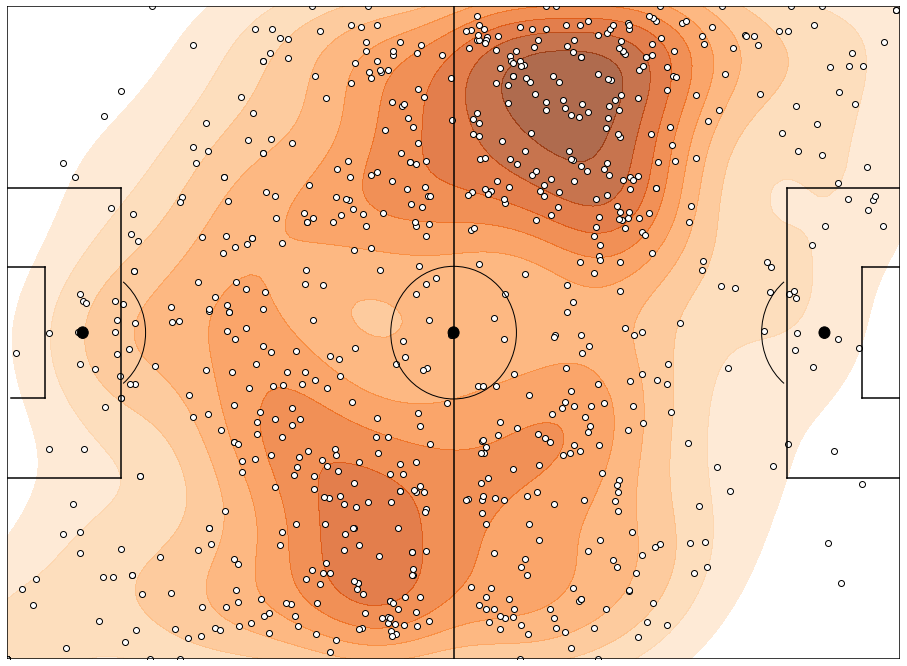

In [5]:
fig, ax = plt.subplots(figsize=[16,12])
x = home[:,0]
y = home[:,1]
ax = plot_field(ax)
ax = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Oranges', alpha=0.7)
ax.scatter(x, y, color='white', edgecolor='black')
plt.show()

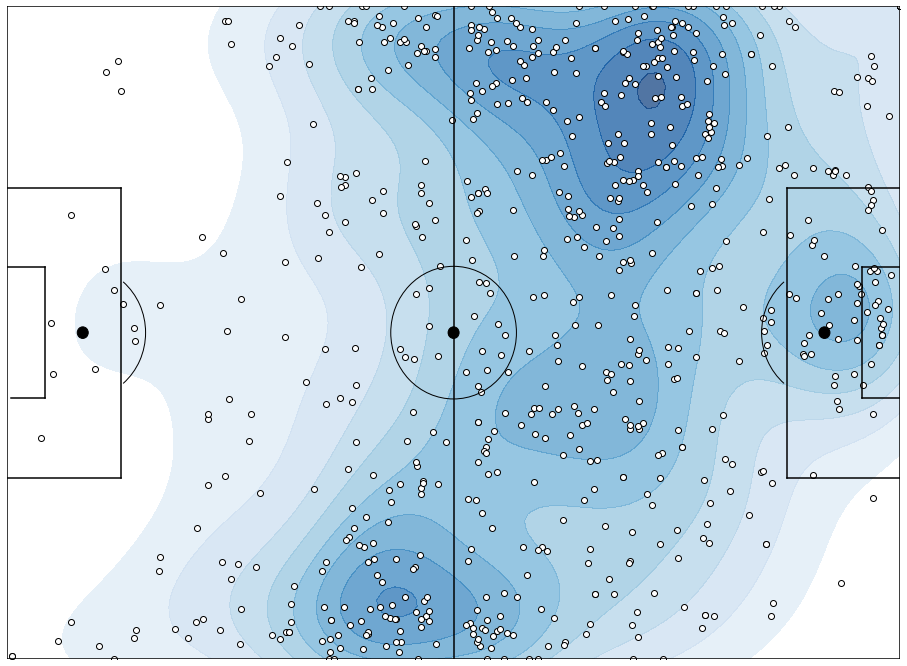

In [6]:
fig, ax = plt.subplots(figsize=[16,12])
x = away[:,0]
y = away[:,1]
ax = plot_field(ax)
ax = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Blues', alpha=0.7)
ax.scatter(x, y, color='white', edgecolor='black')
plt.show()
away_ax = ax

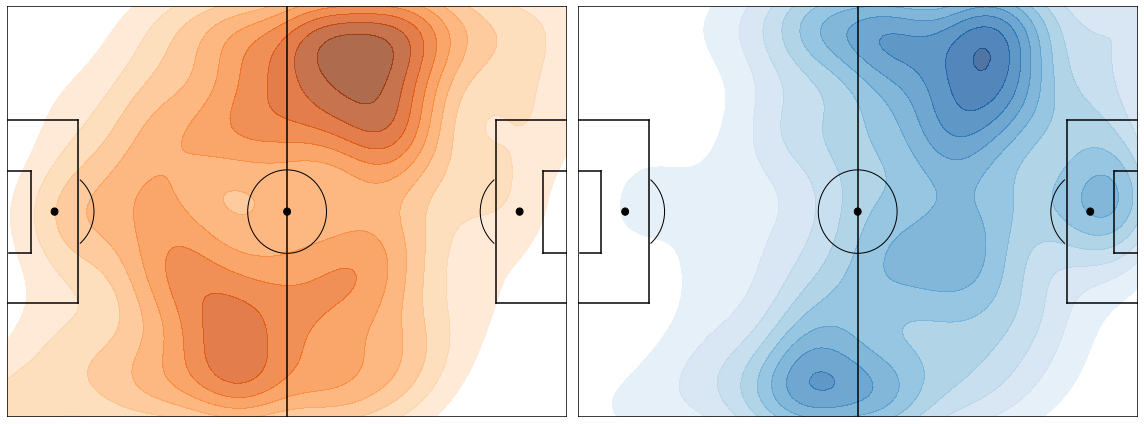

In [18]:
fig, axs = plt.subplots(figsize=[16,6], nrows=1, ncols=2)

axs[0] = plot_field(axs[0])
axs[0].axis('off')
axs[1] = plot_field(axs[1])

#### Home ####
x = home[:,0]
y = home[:,1]
axs[0] = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Oranges', alpha=0.7, ax=axs[0])
# axs[0].scatter(x, y, color='white', edgecolor='black')

#### Away ####
x = away[:,0]
y = away[:,1]
axs[1] = sns.kdeplot(x, y, clip=[[0,130], [0,90]], shade=True, shade_lowest=False, cmap='Blues', alpha=0.7, ax=axs[1])
# axs[1].scatter(x, y, color='white', edgecolor='black')

fig.tight_layout()
plt.show()